# Practice cleaning missing values with California Cities Report

In this project, we will practice how to identifying and cleaning missing (null) values. For this project, we define "missing" only as np.nan values. First, we will practice how to find the missing values, drop columns or rows having missing values, and then we will practice different methods of filling the missing values. We will cover other missing values (for example, empty strings, etc) in other projects.

**Our main focus will be on the pandas methods for:**

1. Identification and Cleaning Missing Values:

    - ``.info()``
    - ``.isna()``
    - ``.isnull()``
    - ``.dropna()``

2. Data Imputation Methods:

    - ``.fillna()``
    - ``.bfill()``
    - ``.ffill()``
    - ``.mode()``
    - ``.mean()``
    - ``.median()``
    
Lets jump right into our notebook and run all the cells till the first question. For this activity, we will be using an interesting dataset of California Cities which unfortunately has been corrupted due to human error and needs some fixing for the missing values. This dataset contains very important information about 482 cities in the Califorina state with data about its cities, their latitude, logitude, elevation, populations, land area, and water area in different metric units. Lets help clean this data so the scientists can use it for geological research.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
df = pd.read_csv('files/california_cities.csv')
df.head()

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765.0,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330.0,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467.0,22.960,10.611,12.349,59.465,27.482,31.983,NaN
3,Albany,37.886944,-122.297778,NaN,43.0,18969.0,5.465,1.788,3.677,14.155,4.632,9.524,NaN
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089.0,7.632,7.631,0.001,19.766,19.763,0.003,NaN


In [46]:
df.columns

Index(['city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

1. Find out the number of missing values in each column and store them in the variable ``col_missing_values``

    Make sure you run all the previous cells. Don't worry if you screw up with the DataFrame! just reload it with the first line of the notebook.

In [47]:
df.isnull().sum()

city                   0
latd                  12
longd                 15
elevation_m           50
elevation_ft          14
population_total       2
area_total_sq_mi       6
area_land_sq_mi        3
area_water_sq_mi       5
area_total_km2         7
area_land_km2          6
area_water_km2         6
area_water_percent    62
dtype: int64

5. Find the total missing values in the whole dataset and store the number in ``df_missing_values``

    You must modify the df variable itself. Don't worry if you screw up with the DataFrame! just reload it with the first line of the notebook.

In [48]:
df_missing_values = df.isnull().sum().sum()
df_missing_values

188

6. Drop the column ``area_water_percent`` as it has the most of its values missing

    You have to drop this column permanently as we can not use it for any purpose.

In [49]:
df.drop(columns=['area_water_percent'], inplace=True)

7. Drop the rows having missing values and store the resulting DataFrame in the variable ``df_narows_dropped``

In [50]:
df_narows_dropped = df.dropna()

In [51]:
df_narows_dropped = df[df.notna().all(axis=1)]

In [52]:
df_narows_dropped = df.dropna(axis=0)

8. Drop Rows with More Than 5 Missing Values

    Remove rows from the DataFrame where the count of non-null values is less than 5, effectively eliminating rows with more than 5 missing values. Save the resulting DataFrame in the variable ``df_rows_dropped`` and make use of the ``thresh`` parameter for this operation.

In [53]:
df_rows_dropped = df.dropna(thresh=5)

In [54]:
# Generate a boolean mask for rows having 5 or fewer missing values
row_mask = df.count(axis=1) >= df.shape[1] - 5

# Produce a new dataframe composed solely of rows passing the mask
df_rows_dropped = df[row_mask]

9. Remove Columns with Missing Values

    Eliminate the columns in the DataFrame that contain missing values. Store the resulting DataFrame in the variable ``df_nacols_dropped``.

In [55]:
df_nacols_dropped = df.dropna(axis = 1)

10. Drop columns with more than 10 missing values and store the resulting DataFrame in the variable ``df_cols_dropped``

In [56]:
missing_values = df.isnull().sum()
missing_values

city                 0
latd                12
longd               15
elevation_m         50
elevation_ft        14
population_total     2
area_total_sq_mi     6
area_land_sq_mi      3
area_water_sq_mi     5
area_total_km2       7
area_land_km2        6
area_water_km2       6
dtype: int64

In [57]:
df.loc[: , missing_values <= 10]

,city,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2
0,Adelanto,31765.0,56.027,56.009,0.018,145.107,145.062,0.046
1,AgouraHills,20330.0,7.822,7.793,0.029,20.260,20.184,0.076
2,Alameda,75467.0,22.960,10.611,12.349,59.465,27.482,31.983
3,Albany,18969.0,5.465,1.788,3.677,14.155,4.632,9.524
4,Alhambra,83089.0,7.632,7.631,0.001,19.766,19.763,0.003
...,...,...,...,...,...,...,...,...
477,Yountville,2933.0,1.531,1.531,0.000,3.966,3.966,0.000
478,Yreka,7765.0,10.053,9.980,0.073,26.036,25.847,0.188
479,YubaCity,64925.0,14.656,14.578,0.078,37.959,37.758,0.201
480,Yucaipa,51367.0,27.893,27.888,0.005,72.244,72.231,0.013


In [58]:
df_cols_dropped = df.loc[: , missing_values <= 10]

## Data Imputation Methods

11. Fill the 50 missing values in ``elevation_m`` with ``-999``. Store your result in the variable ``filled_elevation_m``



In [59]:
filled_elevation_m = df['elevation_m'].fillna(-999)

In [60]:
filled_elevation_m

0       875.0
1       281.0
2      -999.0
3      -999.0
4       150.0
        ...  
477      30.0
478     787.0
479      18.0
480     798.0
481    1027.0
Name: elevation_m, Length: 482, dtype: float64

12. Fill the 7 missing values in ``area_total_km2`` with the value 0 permanently, store your result in the variable ``filled_area_total``

In [63]:
filled_area_total = df['area_total_km2'].fillna(0, inplace = True)

Second solution

In [ ]:
df.loc[df['area_total_km2'].isna(), 'area_total_km2'] = 0
filled_area_total = df['area_total_km2']

13. Fill the missing values of the column ``latd`` using backward filling method and store your result in the variable ``bfill_latd``

In [64]:
bfill_latd = df['latd'].bfill()

Second solution

In [ ]:
bfill_latd = df['latd'].fillna(method='bfill')

14. Fill the 15 missing values of the column ``longd`` using forwarding filling method and store your result in the variable ``ffill_longd``

In [66]:
ffill_longd = df['longd'].ffill()

15. Fill the 2 missing values of the column ``population_total`` with the mean of the column and store your result in the variable ``mean_total_population``

In [67]:
mean_total_population = df['population_total'].fillna(value = df['population_total'].mean())

16. Fill the 5 missing values of the column ``area_water_sq_mi`` with the median value of the column and store your result in the variable ``median_fill``

In [68]:
median_fill = df['area_water_sq_mi'].fillna(value = df['area_water_sq_mi'].median())

17. Fill the 6 missing values of the column ``area_land_km2`` with the ``mode`` value of the column and store your result in the variable ``mode_fill``

In [71]:
mode_fill = df['area_land_km2'].fillna(df['area_land_km2'].mode()[0])

# Cleaning duplicate data from an Online Retail store

In this project, we will be working with an Online Retail dataset, which contains information about transactions made by an online retailer. The dataset includes details such as the invoice number, stock code, description, quantity, invoice date, unit price, customer ID, and country.

Duplicate data is a common issue that can arise in datasets like these, and it's important to be able to identify and remove these duplicates in order to avoid biased or inaccurate analyses. In this practice lab, we will be focusing on identifying and dropping duplicate data using the ``duplicated()`` and ``drop_duplicates()`` methods in pandas.

We will start by exploring the dataset and identifying any duplicate rows using the ``duplicated()`` method. Once we have identified the duplicates, we will use the ``drop_duplicates()`` method to remove them from the dataset. Also, the practice includes usage of different parameters that can be used with the ``drop_duplicates()`` method, such as keep and subset.

By the end of this practice lab, you should feel comfortable using pandas to identify and remove duplicate data from a dataset, and have a better understanding of how to use the ``duplicated()`` and ``drop_duplicates()`` methods with different parameters to achieve the desired outcome.

In [1]:
#to read the dataframe
import pandas as pd

In [2]:
# Reading dataframe
df = pd.read_csv('files/OnlineRetail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#show the number of cells in the dataframe
print("dataset size: ", df.size)

#show the number of records (rows) in the dataframe
print("number of talks: ", len(df))

#show the number of features (coulmns) in the dataframe
print("number of features: ", len(df.columns)) 

dataset size:  4335272
number of talks:  541909
number of features:  8


In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

1. **Which of the following parameters is used to only consider certain columns for identifying duplicates and it by default uses all of the columns?**

``subset``

2. **Which of the following parameters is used to determine whether to modify the DataFrame rather than creating a new one?**

``inplace``

3. **Which of the following parameters takes 'first' as a value?**

`keep`

The solution is ``keep``. It means "determine which duplicates (if any) to keep. For example, ``first`` will drop duplicates except for the first occurrence".

## Basic Activities

For most activities, make sure you are not modifying the original dataframe. In other words: either don't pass an ``inplace`` parameter, or pass it as ``inplace=False``, so your modifications return a new variable.

4. Select duplicate rows in a dataframe from the dataset?

    Perform the selection and store the results in the variable ``duplicate_rows``.

    - Note: use the default parameter of ``keep='first'``.

In [8]:
duplicate_rows = df[df.duplicated(keep='first')]

5. What is the number of duplicate rows?

In [10]:
len(duplicate_rows)

5268

6. Find and drop duplicate rows based on InvoiceNo, StockCode, Quantity, and UnitPrice columns

    This data contains duplicate orders with the same quantity and unit price, so drop these duplicates.

    Perform the dropping and store the results in the variable ``df_without_duplicate_orders``.

In [18]:
df_without_duplicate_orders = df.drop(df.loc[df[['InvoiceNo', 'StockCode','Quantity','UnitPrice']].duplicated()].index)

In [ ]:
df_without_duplicate_orders = df.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice'], inplace=False)

7. Drop duplicates while keeping the first non-NaN value based on InvoiceNo, StockCode, and CustomerID columns

    As each invoice should have the stock code only one time for each customer and the customer may have different quantities: Drop duplicates while keeping the first non-NaN value.

    Perform the dropping and store the results in the variable ``df_keep_first``.

In [24]:
df_keep_first = df.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'CustomerID'], keep='first')
df_keep_first

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


8. Drop duplicates while keeping the last order based on StockCode and InvoiceWeekday columns

    If you want to show number of unique transactions per weekday and StockCode combination, you will need to drop duplicate stockcode on same day.

    Perform the dropping and store the results in the variable ``df_unique_stock_day``.

    - Note: use the ``df_weekday`` prepared for you to solve this activity.

In [26]:
# Convert InvoiceDate column to datetime
df_weekday = df

df_weekday['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for weekday
df_weekday['InvoiceWeekday'] = df['InvoiceDate'].dt.weekday

In [29]:
# Drop duplicates based on StockCode and InvoiceWeekday

df_unique_stock_day = df_weekday.drop_duplicates(subset=['StockCode', 'InvoiceWeekday'], keep='last', inplace=False)

9. Drop all duplicate invoices

    Imagine it is black friday and each customer is allowed to buy only at one invoice. So, we need to drop all the duplicate invoices.

    Perform the dropping and store the results in the variable ``df_black_friday``.

In [36]:
df_black_friday = df.drop_duplicates(subset=['InvoiceNo'], keep=False, inplace=False)

10. Drop duplicate countries while keeping the first row

    Imagine we want to know all unique countries in our stock, drop duplicate countries keeping first row.

    Perform the dropping and store the results in the variable ``df_unique_countries``.

In [38]:
df_unique_countries = df.drop_duplicates(subset=['Country'], keep='first', inplace=False)

11. Drop duplicate products while keeping last based on StockCode, Description, and UnitPrice

    Imagine we want to know all ordered products in our retail, drop duplicate products based on StockCode, Description, and UnitPrice.

    Perform the dropping and store the results in the variable ``df_unique_products``.

In [40]:
df_unique_products = df.drop_duplicates(subset=['StockCode','Description','UnitPrice'], keep='last', inplace=False)

12. Drop all duplicate rows based on TotalCost and CustomerID while keeping first

    We want to know all unique total costs paid by each different customer, So drop these duplicates.

    Perform the dropping and store the results in the variable ``df_customer_unique_payments``.

In [45]:
df_cost = df
# Create a new column for TotalCost
df_cost['TotalCost'] = df_cost['Quantity']*df_cost['UnitPrice']

In [46]:
df_customer_unique_payments = df_cost.drop_duplicates(subset=['UnitPrice','TotalCost'], keep='first', inplace=False)

13. Drop all duplicate rows while keeping first

    Perform the dropping and store the results in the variable ``df_unique``.

In [47]:
df_unique = df.drop_duplicates(keep='first')

# Practice Data Cleaning and String Handling with City Bike data

In New York, Citi Bike operates a network of bicycle rental stations with a subscription system. The stations are all over the city and provide a convenient way to get around. Bike rental data is made public in an anonymized form and has been analyzed in various ways. The data has many string columns to be modified before further usage.

In this section we will practice how to interact and manipulate string data using Pandas ``.str`` method. We will cover the most common string methods like:

- ``.str.capitalize(), .str.lower(), .str.upper(), .str.title()``
- ``.str.contains()``
- ``.str.count()``
- ``.str.endswith(), .str.startswith()``
- ``.str.find()``
- ``.str.join()``
- ``.str.len()``
- ``.str.replace()``
- ``.str.split()``
- ``.str.isdigit() .str.isalpha()``

Let's Jump into the practice so that we will clean the data and bring the columns with messy string forms to nice and usable format.

### Quick analysis

The first few cells in the Notebook read the dataset, display the first few rows (``df.head()``) and show you the column types (``df.info()``). Take your time, exploring the dataset and the columns. Remember that the focus of this project is String Manipulation, so focus on those columns that are of type object.

Once you're ready, jump to the next page to start the activities!

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('files/citi-bikes.csv')
df

,first name,last name,tripduration,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender,emails,pin
0,misty,HarRISs,3117,301,E 2 St & Avenue B,301,E 2 St & Avenue B,18070,Subscriber,1986.0,1,osborneangela@example.com,JPCeiknPMw
1,Alexis,Thompson,690,301,E 2 St & Avenue B,349,Rivington St & Ridge St,19699,Subscriber,1985.0,1,sbutler@example.net,PSxNqDPDWe
2,Jodi,Sanders,727,301,E 2 St & Avenue B,2010,Grand St & Greene St,20953,Subscriber,1982.0,1,egarcia@example.net,pxTMwm166p
3,matrick,Evans,698,301,E 2 St & Avenue B,527,E 33 St & 2 Ave,23566,Subscriber,1976.0,1,zmoore@example.com,w5dktoeXrq
4,Amanda,DaniEEls,351,301,E 2 St & Avenue B,250,Lafayette St & Jersey St,17545,Subscriber,1959.0,1,derrick11@example.com,8hHtmBR0Tt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,Joshua,Donaldson,1225,301,E 2 St & Avenue B,442,W 27 St & 7 Ave,15859,Customer,NaN,0,kelly26@example.net,NaaPhq7R38
4208,Deanna,Nelson,939,301,E 2 St & Avenue B,251,Mott St & Prince St,15683,Customer,NaN,0,seth26@example.net,PWs7OnO37x
4209,Jennifer,Sanchez,914,301,E 2 St & Avenue B,251,Mott St & Prince St,20219,Customer,NaN,0,tamara26@example.org,NNEAV3nI8i
4210,Steven,Riley,1581,301,E 2 St & Avenue B,465,Broadway & W 41 St,23176,Subscriber,1996.0,2,carlosstevenson@example.com,dGBYIsZzM2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first name          4212 non-null   object 
 1   last name           4212 non-null   object 
 2   tripduration        4212 non-null   int64  
 3   start station id    4212 non-null   int64  
 4   start station name  4212 non-null   object 
 5   end station id      4212 non-null   int64  
 6   end station name    4212 non-null   object 
 7   bikeid              4212 non-null   int64  
 8   usertype            4212 non-null   object 
 9   birth year          3682 non-null   float64
 10  gender              4212 non-null   int64  
 11  emails              4212 non-null   object 
 12  pin                 4212 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 427.9+ KB


1. **Capitalize the column first name**

    If you explore the DataFrame, you'll see that the column ``first name`` is "inconsistent" with its capitalization. Some names are capitalized (Alexis, Jodi), but some others are not (misty, matrick).

    Create a new series ``capital_first_name`` that contains the results of the column first name correctly capitalized.

In [8]:
capital_first_name = df['first name'].str.capitalize()

In [9]:
capital_first_name

0          Misty
1         Alexis
2           Jodi
3        Matrick
4         Amanda
          ...   
4207      Joshua
4208      Deanna
4209    Jennifer
4210      Steven
4211      Taylor
Name: first name, Length: 4212, dtype: object

2. Make the Column last name as lower case

    Now we can see the Column ``last name`` has very messy format too. Some of the middle letters are capitalized like in ``HarRISs``, ``DaniEEIs`` and some of the first names are not capitalize. So, convert all of them to lower case and store the result in the variable ``lower_last_name``

In [10]:
lower_last_name = df['last name'].str.lower()

In [11]:
lower_last_name

0         harriss
1        thompson
2         sanders
3           evans
4        danieels
          ...    
4207    donaldson
4208       nelson
4209      sanchez
4210        riley
4211      hancock
Name: last name, Length: 4212, dtype: object

3. Make ``last name`` as Upper case. Store your answer in the variable ``upper_last_name``

In [12]:
upper_last_name = df['last name'].str.upper()

4. How many users in the Column ``usertype`` are Customer

    Lets count all the Customers in the column ``usertype`` and sum them up. Store your sum in the ``customer_counts`` variable.

In [15]:
customer_df = df[df['usertype'] == 'Customer']
customer_counts = len(customer_df['emails'].unique())

530

Solution 1

In [16]:
customer_counts = df['usertype'].str.count('Customer')
customer_counts=customer_counts.sum()
customer_counts

530

Solution 2

In [ ]:
customer_counts = df['usertype'].value_counts()
customer_counts

5. How many users in the Column ``usertype`` are ``Subscribers``

    As you got the total number of Customers in ``usertype`` from the previous question, then also find how many Subscribers are there in total.

    You can subtract the number of Customers from the total lenght of the dataframe to find the remain - which are Subscribers.

In [19]:
df['usertype'].str.count('Subscriber').sum()

3682

6. Find the words in Column ``pin`` which contain the substring ``lol`` and store your selection in the variable ``word_having_lols``

In [24]:
word_having_lols = df['pin'].str.contains('lol')
df['pin'][word_having_lols]

59        Vtdqzzlolk
65          foundlol
117       loVulolKDF
167       nlolzlVd23
2656      6Kolol9toS
2660      lolLQigMjv
2679        FounDlol
2729      26lolbYZ66
2744      PlolJhPbGQ
2765     UuwlolrTHDW
2783      kzlolZJvRk
2804      kfJAlolWxZ
2828      Eh8lolEwKd
2951    145loleGTrpG
Name: pin, dtype: object

7. Find the names in the Column ``first name`` which start with the letter Z

    Find all the names in the ``first name`` column that start with the latter "Z". Store the result in the variable ``starts_with_z``.

    >***Be careful!*** *It's capital Z, not lowercase z.*

In [26]:
starts_with_z = df['first name'].str.startswith('Z')
df['first name'][starts_with_z]

233     Zachary
348     Zachary
431     Zachary
651     Zachary
847     Zachary
1035    Zachary
1270    Zachary
1366    Zachary
1451    Zachary
2371    Zachary
2508    Zachary
2589    Zachary
2854    Zachary
2964    Zachary
3128    Zachary
3156    Zachary
3535    Zachary
3581    Zachary
3712    Zachary
3814    Zachary
Name: first name, dtype: object

8. How many first names start with the letter 'Z'

In [29]:
len(df['first name'][starts_with_z])

20

9. Find the names in the Column ``last name`` which end with 't' and store your result in the variable ``ends_with_t``

In [31]:
ends_with_t = df['last name'].str.endswith('t')
df['last name'][ends_with_t]

67      Lambert
101     Elliott
111      Knight
117     Burnett
126       Grant
         ...   
4107     Hebert
4140     Bryant
4159    Stewart
4181    Garrett
4183     Wright
Name: last name, Length: 145, dtype: object

10. How many Values in the Column last name end with 't'

In [32]:
ends_with_t.sum()

145

11. Concatenate 'bikeid' Entries with Space Separator

    Utilize the ``str.join()`` method to concatenate the bikeid values in the ``bikeid`` column, using a space as the separator. Store the result in the variable ``spaced_bikeids``.

In [37]:
df['bikeid']=df['bikeid'].astype(str)

spaced_bikeids = df['bikeid'].str.join(sep = ' ')

In [38]:
spaced_bikeids

0       1 8 0 7 0
1       1 9 6 9 9
2       2 0 9 5 3
3       2 3 5 6 6
4       1 7 5 4 5
          ...    
4207    1 5 8 5 9
4208    1 5 6 8 3
4209    2 0 2 1 9
4210    2 3 1 7 6
4211    2 3 4 8 4
Name: bikeid, Length: 4212, dtype: object

12. Create a new Column named ``name length`` having all the lengths of names from the Column ``first name``

In [43]:
df['name length'] = df['first name'].str.len()

13. Find if the Column ``pin`` is alpha numeric or it contains digits only

In [47]:
print(f"La columna pin es numerica? {df['pin'].str.isdigit()[0]}")
print(f"La columna pin es alfanumerica? {df['pin'].str.isalpha()[0]}")

La columna pin es numerica? False
La columna pin es alfanumerica? True


14. Verify if the Column ``tripduration`` has any non-numeric values or it contains digits only

In [51]:
df['tripduration'] = df['tripduration'].astype(str)

print(f"La columna tripduration es numerica? {df['tripduration'].str.isdigit()[0]}")
print(f"La columna tripduration es alfanumerica? {df['tripduration'].str.isalpha()[0]}")

La columna tripduration es numerica? True
La columna tripduration es alfanumerica? False


15. Check if any name in the Column ``first name`` has digit(s) or number(s) in it

In [55]:
print(f"La columna first name es numerica? {df['first name'].str.isdigit()[0]}")
print(f"La columna first name es alfanumerica? {df['first name'].str.isalpha()[0]}")
print(f"La columna first name es decimal? {df['first name'].str.isdecimal()[0]}")
df['first name'].str.isalpha().sum()

La columna first name es numerica? False
La columna first name es alfanumerica? True
La columna first name es decimal? False


4208

16. Split the emails in the emails column at ``@`` to find the Domain names and store them in the variable ``email_domains``

In [72]:
email_domains = df['emails'].str.split('@').str[1]

17. Replace the emails having ``.edu`` with ``.org`` and store the output in the variable ``edu_to_org``

In [73]:
# Replace .edu with .org in the email column
edu_to_org = df['emails'].str.replace('.edu', '.org',regex=True)

In [74]:
edu_to_org

0         osborneangela@example.com
1               sbutler@example.net
2               egarcia@example.net
3                zmoore@example.com
4             derrick11@example.com
                   ...             
4207            kelly26@example.net
4208             seth26@example.net
4209           tamara26@example.org
4210    carlosstevenson@example.com
4211       arnolddaniel@example.com
Name: emails, Length: 4212, dtype: object

18. Replace the numeric and the St values in ``end station name`` Column with ``<space>`` so that we can filter the address without street numbers. Store your result in the variable ``clean_address``

In [75]:
# Replace all numeric characters and 'St' with a space
clean_address = df['end station name'].str.replace(r'\d+|St', ' ', regex=True)

In [76]:
clean_address

0             E     & Avenue B
1        Rivington   & Ridge  
2           Grand   & Greene  
3                E     &   Ave
4       Lafayette   & Jersey  
                 ...          
4207             W     &   Ave
4208         Mott   & Prince  
4209         Mott   & Prince  
4210          Broadway & W    
4211          E     & Avenue B
Name: end station name, Length: 4212, dtype: object

# Matching Strings by Similarity using Levenshtein distance

In this project, we're going to resolve a very tough problem, which is identifying similar strings that are not completely equal. It's a very common and challenging data-cleaning task, so let's get right into it!

We have two CSVs containing company names. The problem is that the company names in these two CSVs don't match. Both have a single column, but if you explore them, you'll immediately spot the anomalies.

In [1]:
import itertools
import pandas as pd

# The new library!
from thefuzz import fuzz, process

In [2]:
df1 = pd.read_csv('files/companies_1.csv')
df2 = pd.read_csv('files/companies_2.csv')

In [3]:
df1.head(10)

,CLIENT
0,"Adobe Systems, Inc."
1,Adventist Health
2,AECOM
3,Aerojet Rockedyne Holdings (GenCorp)
4,Alameda-Contra Costa Transit District
5,Alaska Community Foundation
6,Alaska Retirement Management Board
7,"Alexander & Baldwin, Inc."
8,"Allergan, Inc."
9,Alyeska Pipeline Service Company


In [4]:
df2.head(10)

,Firm Name
0,"AAA Northern California, Nevada & Utah Auto Ex..."
1,ACCO Engineered Systems
2,Adams County Retirement Plan
3,"Adidas America, Inc."
4,"Adobe Systems, Inc."
5,"Advanced Micro Devices, Inc."
6,AECOM Technology Corporation
7,Aera Energy LLC
8,"Aerojet Rocketdyne Holdings, Inc."
9,"Agilent Technologies, Inc."


In [5]:
print(df1.shape)
print(df2.shape)

(266, 1)
(368, 1)


You can see that the company ***AECOM*** appears as ``AECOM`` in CSV1, but as ``AECOM Technology Corporation`` in CSV2.

To do so, we're going to use an external library called ``thefuzz`` that contains functionality to compute the Levenshtein distance between two strings. More on this later.

Your job will be cleaning this data and matching the columns in both CSVs. Let's get started.

## Data Preprocessing

Before we can compare the company names, we need to read the data and align the companies for comparison. To do so, we'll need to use the ``itertools.product`` function to create the "cartesian product" between the two CSVs. Very briefly, the Cartesian Product of two coll
ections ``A`` and ``B``, returns a combination of ALL the elements in both ``A`` and ``B``.

Example:
```py
>>> A = ["Apple", "Alphabet", "Microsoft"]
>>> B = ["MSFT", "Alphabet/Google", "Apple inc."]

>>> list(itertools.product(A, B))
[('Apple', 'MSFT'),
 ('Apple', 'Alphabet/Google'),
 ('Apple', 'Apple inc.'),
 ('Alphabet', 'MSFT'),
 ('Alphabet', 'Alphabet/Google'),
 ('Alphabet', 'Apple inc.'),
 ('Microsoft', 'MSFT'),
 ('Microsoft', 'Alphabet/Google'),
 ('Microsoft', 'Apple inc.')]

```
As you can see, every element in A is matched with every element in B.

In [6]:
## Para el lanzamiento de dos dados la combinatoria sería de la siguiente manera

dado_1 =  [1,2,3,4,5,6]
dado_2 =  [1,2,3,4,5,6]

len(list(itertools.product(dado_1, dado_2)))


36

> **NOTA** ``itertools.product``: Funciona para calcular las posibles combinaciones usando un producto cartesiano de dos series

1. Create the ``df`` dataframe containing the product of the two CSVs

    We have already read the 2 CSVs into the ``df1`` and ``df2`` variables. Now, use the ``itertools.product`` method to create a resulting dataframe ``df`` that will contain the product of the two CSVs. The columns should be named ``CSV 1`` and ``CSV 2``.

    As we have ``266`` rows in ``df1`` and ``368`` in ``df2``, the resulting ``df`` will have ``97,888`` rows (266 * 368), and it'll look something like:

In [7]:
lista = list(itertools.product(list(df1.iloc[:,0]), list(df2.iloc[:,0])))

df = pd.DataFrame(lista, columns=['CSV 1', 'CSV 2'])

Otra solución

In [ ]:
csv_1 = df1['CLIENT'].values
csv_2 = df2['Firm Name'].values

companies = itertools.product(csv_1, csv_2)

df = pd.DataFrame(companies, columns=['CSV 1', 'CSV 2'])

## Calculating the Levenshtein distance

We're going to use the ``partial_ratio`` function from the ``fuzz`` module to compute the "distance" between two strings. The result is a number between 0 and ``100``, with ``100`` indicating a "perfect" match. Please keep in mind that this method is not perfect, as shown in the examples about ``Microsoft`` in the notebook.

Now, we will learn how to calculate the Levenshtein distance between two strings. Here we will user ``partial_ratio`` function from the fuzz module to compute the "ratio" between two strings. The result is a number between 0 and 100, with 100 indicating a "perfect" match. Please note that ``partial_ratio`` gives ratio of the shortest string length to the longest string length. For example, if the first string is ``ABC`` and the second string is ``ABDC``, then the ratio will be 4/5 = 0.80.

In [8]:
fuzz.partial_ratio("Apple", "Apple Inc.")

100

In [9]:
fuzz.partial_ratio("Microsoft", "Apple Inc.")

11

In [10]:
fuzz.partial_ratio("Microsoft", "MSFT")

25

If we have list of strings, we can calculate the Levenshtein distance between each pair of strings in the list.

In [11]:
A = ["Apple", "Alphabet", "Microsoft"]
B = ["MSFT", "Alphabet/Google", "Apple inc."]

Below, we combined the two list ``A`` and ``B`` into a list of tuples ``companies`` using product function from ``itertools`` module.

Then, we calculated the partial ratio for each pair of strings in the list companies using ``partial_ratio`` function from ``fuzz``.

In [12]:
companies = list(itertools.product(A, B))
companies

[('Apple', 'MSFT'),
 ('Apple', 'Alphabet/Google'),
 ('Apple', 'Apple inc.'),
 ('Alphabet', 'MSFT'),
 ('Alphabet', 'Alphabet/Google'),
 ('Alphabet', 'Apple inc.'),
 ('Microsoft', 'MSFT'),
 ('Microsoft', 'Alphabet/Google'),
 ('Microsoft', 'Apple inc.')]

In [13]:
for c1, c2 in companies:
    ratio = fuzz.partial_ratio(c1, c2)
    print(f"{c1} > {c2}: {ratio}")

Apple > MSFT: 0
Apple > Alphabet/Google: 40
Apple > Apple inc.: 100
Alphabet > MSFT: 0
Alphabet > Alphabet/Google: 100
Alphabet > Apple inc.: 38
Microsoft > MSFT: 25
Microsoft > Alphabet/Google: 22
Microsoft > Apple inc.: 22


You will see the greater the ratio, the more similar the strings are.

2. Create a new column ``Ratio Score`` that contains the distance for all the rows in df

    Now apply the function ``fuzz.partial_ratio`` to all the companies in ``df`` to calculate the distance between them. Store the distance in a new column named ``Ratio Score``. It'll look similar to:

For the simplest solution, we can use list comprehension to generate the scores from the dataframe ``df``:

In [ ]:
scores = [fuzz.partial_ratio(c1, c2) for c1, c2 in df.values]
df['Ratio Score'] = scores

Or, we can use the apply method to apply the function to all the rows in df:

In [15]:
df['Ratio Score'] = df.apply(lambda row: fuzz.partial_ratio(row['CSV 1'], row['CSV 2']), axis=1)

In [16]:
df.values[0]

array(['Adobe Systems, Inc.',
       'AAA Northern California, Nevada & Utah Auto Exchange', 26],
      dtype=object)

3. How many rows have a Ratio score of 90 or more?

In [21]:
len(df[df['Ratio Score'] >= 90])

106

4. What's the corresponding company in CSV2 to ``AECOM`` in CSV1?

    We saw that in ``CSV 1`` there's a company ``AECOM``, what's the corresponding value in ``CSV 2``? The higher the Ratio Score, the more likely it is to be a match. So, use 

In [25]:
df[(df['CSV 1'] == 'AECOM') & (df['Ratio Score'] > 90)]['CSV 2']

742    AECOM Technology Corporation
Name: CSV 2, dtype: object

5. What's the corresponding ``CSV 2`` company of Starbucks?

    ``CSV 1`` company is ``Starbucks``, what's the corresponding name in ``CSV 2``?

In [26]:
df[(df['CSV 1'] == 'Starbucks') & (df['Ratio Score'] > 90)]['CSV 2']

77948    Starbucks Corporation
Name: CSV 2, dtype: object

6. Is there a matching company for ``Pinnacle West Capital Corporation`` in column ``CSV 2``?

    Column ``CSV 1`` contains ``Pinnacle West Capital Corporation``, name a matching company in column ``CSV 2`` with a ratio score more than ``90``?

In [29]:
df[(df['CSV 1'] == 'Pinnacle West Capital Corporation') & (df['Ratio Score'] >= 80)]

,CSV 1,CSV 2,Ratio Score
61128,Pinnacle West Capital Corporation,Avista Corporation,83
61130,Pinnacle West Capital Corporation,Ball Corporation,88


7. How many matching companies are there for ``County of Los Angeles Deferred Compensation Program``?

    ``CSV 1`` contains the ``County of Los Angeles Deferred Compensation Program``. How many matching companies seem to be in ``CSV 2``?

In [31]:
df[(df['CSV 1'] == 'County of Los Angeles Deferred Compensation Program') & (df['Ratio Score'] > 90)]

,CSV 1,CSV 2,Ratio Score
26206,County of Los Angeles Deferred Compensation Pr...,City of Los Angeles Deferred Compensation,95
26227,County of Los Angeles Deferred Compensation Pr...,County of Los Angeles Deferred Compensation Pr...,100


8. Is there a matching company for ``The Queens Health Systems``?

    ``CSV 1`` contains ``The Queens Health Systems``, is there a matching in CSV 2?

In [32]:
df[(df['CSV 1'] == 'The Queens Health Systems') & (df['Ratio Score'] > 90)]

,CSV 1,CSV 2,Ratio Score
84220,The Queens Health Systems,The Queen's Health Systems,96


# String pre-processing for Sentiment Analysis in NLP

In this project, we'll use NLTK, the de-facto and most popular NLP Python library to perform some Sentiment Analysis on a corpus of +22K tweets scraped during the 2022 FIFA world cup.

But the objective of this project is not to perform Sentiment Analysis or NLP, as that's outside of the scope of this skill track. The goal of this project is to perform several pre-processing and cleaning tasks to the text of the tweets in order to render them ready for the Sentiment Analysis task.

The dataset we're using already includes the classification of Sentiment which was performed with an advanced Deep Learning model based on on [Meta's AI RoBERTa](https://ai.meta.com/blog/roberta-an-optimized-method-for-pretraining-self-supervised-nlp-systems/).

Our goal will be to perform the right pre-processing tasks and then use NLTK's built-in [VADER](https://www.nltk.org/howto/sentiment.html) module to perform a very rudimentary version of Sentiment Analysis, and compare its performance with the original's Sentiment column included in the dataset.

Most NLP projects require several cleaning and pre-processing tasks, like tokenization, stemming, lemmatization, etc. Don't worry if you don't understand what they are, we'll explain them as they're required in the project. The important part is to understand that the complexity of NLP usually relies mostly on the pre-processing and cleaning, than the NLP models themselves.

Let's get started!

1. Read dataset, but only the ``Tweet`` and ``Sentiment`` columns

    Read the data in ``fifa_world_cup_2022_tweets.csv`` into a dataframe, but only the columns ``Tweet`` and ``Sentiment``.

    Your ``df`` should look something like:

In [4]:
import re

import pandas as pd
import numpy as np

In [34]:
import nltk
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DVadeus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


1. Read dataset, but only the Tweet and Sentiment columns

    Read the data in ``fifa_world_cup_2022_tweets.csv`` into a dataframe, but only the columns ``Tweet`` and ``Sentiment``.

    Your ``df`` should look something like:

In [56]:
df = pd.read_csv('files/fifa_world_cup_2022_tweets.csv', usecols =['Tweet', 'Sentiment'])

2. Lowercase the column ``Tweet`` in the new column ``Tweet Lower``

    Create a new column Tweet Lower that contains the contents of the ``Tweet`` column, but all lowercased.

In [57]:
df['Tweet Lower'] = df['Tweet'].str.lower()

In [58]:
print(df.iloc[0]['Tweet Lower'])

what are we drinking today @tucantribe 
@madbears_ 
@lkinc_algo 
@al_goanna 

#worldcup2022 https://t.co/oga3tzvg5h


3. Remove all URLs from ``Tweet Lower`` in ``Tweet Clean``

    URLs, hashtags, mentions are mostly useless elements when it comes to sentiment analysis. We'll start by removing all the URLs. Remove all the URLs from Tweet Lower and store your results in Tweet Clean.

    Warning! Don't forget to remove any leading or trailing whitespaces. For example, if you remove the URL from the following tweet:

    ```py
    what are we drinking today @tucantribe 
    @madbears_ 
    @lkinc_algo 
    @al_goanna 
    
    #worldcup2022 https://t.co/oga3tzvg5h
    ```

    The result should be:
    
    ``` py
    """what are we drinking today @tucantribe 
    @madbears_ 
    @lkinc_algo 
    @al_goanna 

    #worldcup2022"""
    ```
    
    Without a trailing space after the #worldcup2022 hashtag.

    > *Use this pattern for matching the url: ``https?:\/\/[^\s]*``*

In [59]:
df['Tweet Clean'] = df.apply(lambda row: re.sub('https?:\/\/[^\s]*', "", row['Tweet Lower'], flags=re.MULTILINE).strip(), axis=1)

In [60]:
df['Tweet Clean'][0]

'what are we drinking today @tucantribe \n@madbears_ \n@lkinc_algo \n@al_goanna \n\n#worldcup2022'

4. Remove username mentions in ``Tweet Clean``

    Still in ``Tweet Clean``, remove any twitter mentions (in the form ``@datawars_io``). In this case, we're modifying the original column Tweet Clean, so if you make a mistake, you'll have to re-run your previous code and start over.

    Remember to strip any trailing or leading whitespaces.

In [61]:
df['Tweet Clean'] = df['Tweet Clean'].str.replace('@[\w]*', '',regex = True, flags = re.MULTILINE).str.strip()

5. Remove Hashtags from Tweet Clean

    Still in Tweet Clean, remove any hashtags.

In [62]:
df['Tweet Clean'] = df['Tweet Clean'].str.replace('#[\w]*', '',regex = True, flags = re.MULTILINE).str.strip()

## Tokenizing Tweets

6. Create the list ``tokenized_tweets`` by applying the function ``word_tokenize`` to the values of the column ``Tweet Clean``

    We'll now start using the ``nltk`` module. Don't worry if you've never used it before, as these are all simple functions that don't require an NLP background.

    We'll start by "tokenizing" the tweets. Tokenizing means basically splitting a corpus of text into different words or tokens.

    Your task is to use the ``word_tokenize`` function to create a list of tweet tokens and store the result in ``tokenized_tweets``. This means that ``tokenized_tweets`` is a list of lists, a list of tokens in the following form:
    ```py
    [
        ['what', 'are', 'we', 'drinking', 'today'], # tweet
        ['worth', 'reading', 'while', 'watching'],  # tweet
    ]
    ```

In [64]:
tokenized_tweets = [word_tokenize(w) for w in df['Tweet Clean'].values]

7. Filter stop words

    Stop words are words that don't contribute much to the meaning of a sentence, like conjunctions ("for", "and") or the word "the", "a", etc. The ``nltk`` module contains stop words for english, that we can get with ``stopwords.words('english')``.

    Your task is to remove any stop words from the tokens you have previously generated. Store your results in the variable ``filtered_tokenized_tweets``, which continues to be a list of lists, but with the stop words filtered out.

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DVadeus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
stop_words_english = set(stopwords.words('english'))

In [69]:
filtered_tokenized_tweets = [[w for w in tweet if w not in stop_words_english] for tweet in tokenized_tweets]

## Performing Sentiment Analysis

We'll now start the process of sentiment analysis using the builtin ``SentimentIntensityAnalyzer`` NLTK class, also known as VADER.

Vader works well for the basic tasks, for example this will be classified mostly as a positive sentence:

```py
>>> analyzer.polarity_scores("DataWars is awesome! I love it so much!")
{'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compound': 0.8715}
```

But it can't handle things like sarcasm or rethorical questions. For example, sarcasm is completely lost to the analyzer, this is clearly a negative sentence:

```py
>>> analyzer.polarity_scores("Yeah, R is sure a great programming language. If you are 80 years old")
{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.8225}
```

While the following one, which is not as extreme as the previous one, could also be arguably classified as negative. Instead, it's found to be completely neutral:
```py
>>> analyzer.polarity_scores("I can't believe how people still program in R in 2019, what is going on?")
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
```

Don't worry too much about the contents of the resulting dictionary, we'll explain them in the following activities.

8. Glue all the tweets back again

    Use a single space to concat the tokens that we have preprocessed in our previous tasks and build the tweet again. Store your results in the variable ``cleaned_tweets``. In this case, it'll no longer be a list of lists, but a list of strings, the tweets we have assembled again, and it'll look something like:
    ```py
    ['drinking today',
    'amazing launch video . shows much face canada men ’ national team changed since last world cup entry 1986. ’ wait see boys action ! canada : fifa world cup opening video',
    'worth reading watching']
    ```

In [83]:
cleaned_tweets = []
for tweet in filtered_tokenized_tweets:
    word = ''
    for t in tweet:
        word += t+' '
    cleaned_tweets.append(word.strip())

Mejor solución

In [85]:
cleaned_tweets = [' '.join(tweet) for tweet in filtered_tokenized_tweets]
cleaned_tweets[:5]

['drinking today',
 'amazing launch video . shows much face canada men ’ national team changed since last world cup entry 1986. ’ wait see boys action ! canada : fifa world cup opening video',
 'worth reading watching',
 'golden maknae shinning bright',
 'bbc cares much human rights , homosexual rights , women rights say opening ceremony ? ? saying opening ceremony ? ? bbc censor opening ceremony ? ?']

9. Apply VADER to all the words

    Use the ``analyzer.polarity_scores`` method to perform sentiment analysis on all the tweets in ``cleaned_tweets``. Store the list of results in the variable ``tweet_sentiment_scores``.

    As we mentioned before, this requires just a method invocation:
    ```py
    >>> analyzer.polarity_scores(YOUR_TWEET)
    ```
    Your ``tweet_sentiment_scores`` variable will look something like:
    ```py
    [
        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
        {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.6239},
        {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263},
        ...
    ]
    ```

In [92]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DVadeus\AppData\Roaming\nltk_data...


True

In [93]:
analyzer = SentimentIntensityAnalyzer()

In [96]:
tweet_sentiment_scores = [analyzer.polarity_scores(tweet) for tweet in cleaned_tweets]

In [97]:
tweet_sentiment_scores[:5]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'compound': 0.6239},
 {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263},
 {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404},
 {'neg': 0.13, 'neu': 0.739, 'pos': 0.13, 'compound': 0.0}]

10. Calculate the sentiment of each tweet based on the following rule....

    The result of ``analyzer.polarity_scores`` is a dictionary with several keys:
    
    ```py
    >>> analyzer.polarity_scores("DataWars is awesome! I love it so much!")
    {'neg': 0.0, 'neu': 0.36, 'pos': 0.64, 'compound': 0.8715}
    ```
    
    The ``neg``, ``neu`` and ``pos`` keys represent the proportions of the text that fall in each category (Negative, Neutral and Positive). They add up to 1.

    But the key that we're really interested in is ``compound``, which is a weighted composite score that has been normalized between -1 (most extreme negative) and +1 (most extreme positive). In this case, the ``compound`` score of 0.8715 indicates a very high positive sentiment.

    The general rule of thumb for interpreting the ``compound`` score is:

    - Positive sentiment: ``compound`` score > 0.05
    - Neutral sentiment: ``compound`` score between -0.05 and 0.05
    - Negative sentiment: ``compound`` score < -0.05
    
    Calculate the sentiment of each score and store it in the variable ``tweet_sentiment_results`` that should look something like: ``['neutral', 'positive', 'positive', ...]``.

In [100]:
tweet_sentiment_results = ['positive' if score['compound'] > 0.05 else 'negative' if score['compound'] < -0.05 else 'neutral' for score in tweet_sentiment_scores]

Otra opción

In [ ]:
def get_sentiment(res):
    comp = res['compound']
    if comp > .05:
        return "positive"
    elif comp < -.05:
        return "negative"
    return "neutral"


In [ ]:
tweet_sentiment_results = [get_sentiment(score) for score in tweet_sentiment_scores]
tweet_sentiment_results[:3]

11. Delete the columns ``Tweet Lower`` and ``Tweet Clean`` from and add the new column ``Calculated Sentiment``

    Remove the columns we previously used (``Tweet Lower``, ``Tweet Clean``) and create a new one named ``Calculated Sentiment`` with the results of ``tweet_sentiment_results``.

In [102]:
df.drop(columns=['Tweet Lower', 'Tweet Clean'], inplace = True)
df['Calculated Sentiment'] = tweet_sentiment_results

12. How many tweets were incorrectly classified?

    Assuming the column ``Sentiment`` had the correct sentiment, how many did we classified erroneously in our ``Calculated Sentiment`` column?

In [104]:
df[df['Sentiment'] != df['Calculated Sentiment']]

,Tweet,Sentiment,Calculated Sentiment
4,"If the BBC cares so much about human rights, h...",negative,neutral
6,Look like a only me and the Jamaican football ...,neutral,positive
7,Really? Football on a Monday morning at 9 and ...,negative,neutral
8,"As the World Cup starts in Qatar, it’s Black A...",positive,negative
10,#Qatar tried to help its useless soccer team 5...,negative,positive
...,...,...,...
22514,#WorldCup2022 is starting tonight\nAnd with th...,negative,positive
22517,The World Cup starts TODAY!\n\n#Qatar2022 #Foo...,positive,neutral
22519,Here We go World cup 2022 #WorldCup2022,positive,neutral
22520,Anderlecht confirms former Viborg FF's Jesper ...,neutral,positive


13. How many Negative tweets were incorrectly classified (either as ``Neutral`` or ``Positive``)?

In [105]:
df[(df['Sentiment'] == 'negative') & (df['Sentiment'] != df['Calculated Sentiment'])]

,Tweet,Sentiment,Calculated Sentiment
4,"If the BBC cares so much about human rights, h...",negative,neutral
7,Really? Football on a Monday morning at 9 and ...,negative,neutral
10,#Qatar tried to help its useless soccer team 5...,negative,positive
36,"If the BBC cares so much about human rights, g...",negative,neutral
38,"With your looks, you couldn't even get with a ...",negative,neutral
...,...,...,...
22448,If the Royal Family can pressure the Supreme C...,negative,positive
22449,I can’t believe the World Cup starts tomorrow....,negative,neutral
22455,The World Cup should have started today so the...,negative,neutral
22496,#Qatar doing to the #WorldCup2022 what @elonmu...,negative,positive


# Practicing identifyin and dealing with invalid values

In this project, we will be working with a Human Resources dataset containing information about employees from a fictional company. The dataset includes details such as employee ID, date of birth, gender, marital status, job title, department, salary, performance score, and other columns.

Invalid or missing values are common issues that can arise in datasets like these, and it's important to be able to identify and clean these invalid values to avoid biased or inaccurate analyses. In this lab, we will be focusing on cleaning invalid values in selected columns using different methods in pandas.

We will start by exploring the dataset and identifying any invalid or missing values in the selected columns using different methods to clean the data, based on the data type. We will focus on 4 different types: - Invalid numeric column - Invalid categories - Invalid datetimes - Invalid patterns in strings

By the end of this lab, you should feel comfortable using pandas to clean invalid values in a dataset, and have a better understanding of how to use different methods and techniques to achieve the desired outcome. The lab includes basic activities and advanced activities, focusing on different aspects of cleaning invalid values in the Human Resources dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('files/HRDataset.csv')

In [3]:
df.head()

,Employee_Name,EmpID,DeptID,Salary,PositionID,Position,State,Zip,DOB,Sex,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Email,Phone
0,"Adinolfi, Wilson K",10026,5,62506,19,Production Technician I,MA,1960,07/10/83,M,...,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,Adinolfi@company.com,+62 199-807-6651
1,"Ait Sidi, Karthikeyan",10084,3,104437,27,Sr. DBA,MA,2148,05/05/75,M,...,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,Ait Sidi@company.com,+358 128-157-9500
2,"Akinkuolie, Sarah",10196,5,64955,20,Production Technician II,MA,1810,09/19/88,F,...,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,Akinkuolie@company.com,+474 737-382-6683
3,"Alagbe,Trina",10088,5,64991,19,Production Technician I,MA,1886,09/27/88,F,...,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,Alagbe@company.com,+806 538-458-2517
4,"Anderson, Carol",10069,5,50825,19,Production Technician I,MA,2169,09/08/89,F,...,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,Anderson@company.com,+148 658-824-9500


In [4]:
df.head().T

,0,1,2,3,4
Employee_Name,"Adinolfi, Wilson K","Ait Sidi, Karthikeyan","Akinkuolie, Sarah","Alagbe,Trina","Anderson, Carol"
EmpID,10026,10084,10196,10088,10069
DeptID,5,3,5,5,5
Salary,62506,104437,64955,64991,50825
PositionID,19,27,20,19,19
Position,Production Technician I,Sr. DBA,Production Technician II,Production Technician I,Production Technician I
State,MA,MA,MA,MA,MA
Zip,1960,2148,1810,1886,2169
DOB,07/10/83,05/05/75,09/19/88,09/27/88,09/08/89
Sex,M,M,F,F,F


## Discovering the dataset

In [5]:
#show the number of cells in the dataframe
print("dataset size: ", df.size)

#show the number of records (rows) in the dataframe
print("number of employees: ", len(df))

#show the number of features (columns) in the dataframe
print("number of features: ", len(df.columns)) 

dataset size:  9641
number of employees:  311
number of features:  31


1. Clean the column Salary by removing invalid values

    Invalid values are defined as any value that is not an integer.

    Perform the selection of valid values and store them in column ``Salary_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_salaries``.

In [6]:
df['Salary_Fixed'] = df[df['Salary'].str.isnumeric()]['Salary']

In [7]:
df_invalid_salaries = df.loc[df['Salary_Fixed'].isna(), ['Salary']]

In [8]:
df_invalid_salaries

,Salary
22,oFtFtkls
41,HEbELLmj
62,DMZIQhGz
71,XSfelyZh
117,RxhGvEBX
138,xqCStzCF
165,gHNxOVWk
216,WXrOyJEO
220,OAWNTcGQ
259,dvCsKwyl


2. Clean the column ``Zip`` by removing invalid values

    Invalid values are defined as any value that is not an integer.

    Perform the selection of valid values and store them in column ``Zip_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_zip``.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   DeptID                      311 non-null    int64  
 3   Salary                      311 non-null    object 
 4   PositionID                  311 non-null    int64  
 5   Position                    311 non-null    object 
 6   State                       311 non-null    object 
 7   Zip                         311 non-null    object 
 8   DOB                         310 non-null    object 
 9   Sex                         311 non-null    object 
 10  MaritalDesc                 311 non-null    object 
 11  CitizenDesc                 311 non-null    object 
 12  HispanicLatino              311 non-null    object 
 13  RaceDesc                    311 non

In [15]:
df['Zip_Fixed'] = df.loc[df['Zip'].str.isnumeric(), ['Zip']]

df_invalid_zip = df.loc[df['Zip_Fixed'].isna(), ['Zip']]

3. Clean the column ``ManagerID`` by removing invalid values.

    Invalid values are defined as any value that is not an integer or is an integer below 1.

    Perform the selection of valid values and store them in column ``ManagerID_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_managerID``.

In [9]:
df['ManagerID']

0      22.0
1       4.0
2      20.0
3      16.0
4        No
       ... 
306    20.0
307    12.0
308     2.0
309     4.0
310    14.0
Name: ManagerID, Length: 311, dtype: object

- Convierto los datos a int

In [10]:
df['ManagerID_Fixed'] = pd.to_numeric(df['ManagerID'], errors = 'coerce')

In [15]:
df_invalid_managerID = df.loc[(df['ManagerID_Fixed'].isna()) | (df['ManagerID_Fixed'] < 1),['ManagerID']]

## Invalid Categories

4. Clean the column ``Sex`` by removing invalid values

    Invalid values are defined as any value other than ``M`` or ``F``.

    Perform the selection of valid values and store them in column ``Sex_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_sex``.

In [18]:
valid_sex = ['F', 'M']

In [23]:
df['Sex_Fixed'] = df.loc[df['Sex'].isin(valid_sex)]['Sex']

In [31]:
df_invalid_sex = df.loc[df['Sex_Fixed'].isna(), ['Sex']]

5. Clean the column ``RaceDesc`` by removing invalid values

    Invalid values are defined as any value other than [``White``, ``Black or African American``, ``Asian``, ``Two or more races``, ``American Indian or Alaska Native``, ``Hispanic``].

    Perform the selection of valid values and store them in column ``RaceDesc_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_race``.

In [38]:
valid_races = ['White', 'Black or African American', 'Asian', 'Two or more races', 'American Indian or Alaska Native', 'Hispanic']

df['RaceDesc_Fixed'] = df[df['RaceDesc'].isin(valid_races)]['RaceDesc']

df_invalid_race = df.loc[df['RaceDesc_Fixed'].isna(), ['RaceDesc']]


6. Clean the column ``MaritalDesc`` by removing invalid values

    Invalid values are defined as any value other than ``Single``, ``Married``, ``Divorced``, ``Separated``, or ``Widowed``.

    Perform the selection of valid values and store them in column ``MaritalDesc_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_marital_status``.

In [45]:
valid_MaritalDesc = ['Single', 'Married', 'Divorced', 'Separated', 'Widowed']

df['MaritalDesc_Fixed'] = df[df['MaritalDesc'].isin(valid_MaritalDesc)]['MaritalDesc']

df_invalid_marital_status = df.loc[df['MaritalDesc_Fixed'].isna(),['MaritalDesc']]

## Invalid Datetimes

7. Clean the column ``DOB`` by removing invalid values

    Invalid values are defined as any value that is not a datetime(%m/%d/%y).

    Perform the selection of valid values and store them in column ``DOB_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_DOB``.

In [51]:
df['DOB_Fixed'] = pd.to_datetime(df['DOB'], format = '%m/%d/%y', errors='coerce')

df_invalid_DOB = df.loc[df['DOB_Fixed'].isna(),['DOB']]

8. Clean the column ``DateofHire`` by removing invalid values

    Invalid values are defined as any value that is not a datetime.

    Perform the selection of valid values and store them in column ``DateofHire_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_HireDate``.

In [54]:
df['DateofHire']

0       7/5/2011
1      3/30/2015
2       7/5/2011
3       1/7/2008
4      7/11/2011
         ...    
306     7/7/2014
307     9/2/2008
308    4/10/2010
309    3/30/2015
310    9/29/2014
Name: DateofHire, Length: 311, dtype: object

In [57]:
df['DateofHire_Fixed'] = pd.to_datetime(df['DateofHire'], errors='coerce')

df_invalid_HireDate = df.loc[df['DateofHire_Fixed'].isna(),['DateofHire']]

## Invalid patterns in strings

9. Clean the column ``Email`` by removing invalid values

    Invalid values are defined as any value that does not contain ``@``.

    Perform the selection of valid values and store them in column ``Email_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_Email``.       

In [62]:
df['Email_Fixed'] = df[df['Email'].str.contains('@')]['Email']

df_invalid_Email = df.loc[df['Email_Fixed'].isna(),['Email']]

In [63]:
df_invalid_Email

,Email
109,test.com
242,myemail


10. Clean the column ``Phone`` by removing invalid values

    Invalid values are defined as any value that does not contain ``+``.

    Perform the selection of valid values and store them in column ``Phone_Fixed`` while invalid values should be ``NaN``. Then select invalid values and store the results in the variable ``df_invalid_Phone``.

In [65]:
df['Phone']

0       +62 199-807-6651
1      +358 128-157-9500
2      +474 737-382-6683
3      +806 538-458-2517
4      +148 658-824-9500
             ...        
306    +346 569-742-3347
307    +662 252-740-5156
308    +906 560-943-6189
309    +576 550-884-2326
310    +464 505-330-3803
Name: Phone, Length: 311, dtype: object

In [73]:
df['Phone_Fixed'] = df[df['Phone'].str.contains('\+')]['Phone']


df_invalid_Phone = df.loc[df['Phone_Fixed'].isna(),['Phone']]

In [74]:
df_invalid_Phone

,Phone
282,236
291,658-824-9500


# Dealing with invalid value by statistical definitions

In this project, we will be working with a Google Play Store dataset containing information about more than 300K applications. The dataset includes details such as app name, category, rating, rating count, installs, minimum installs, maximum installs, free, price, currency, size, minimum Android, developer ID, developer website, developer email, released, privacy policy, last updated, content rating, ad-supported, in-app purchases, and editor's choice.

Invalid range and outliers are common issues that can arise in datasets like these, and it's important to be able to identify and clean these invalid values to avoid biased or inaccurate analyses. In this lab, we will be focusing on cleaning invalid range and outliers in selected columns using different methods in pandas.

We will start by exploring the dataset and identifying any invalid range or outlier values in the selected columns. Once we have identified them, we will use different methods to clean the data, such as setting the invalid values to NaN or dropping the rows containing these values. Also, the lab includes using different techniques for defining and identifying outliers, such as standard deviation, interquartile range, percentiles/quantiles, or fixed values provided by us.

By the end of this lab, you should feel comfortable using pandas to clean invalid range and outliers in a dataset, and have a better understanding of how to use different methods and techniques to achieve the desired outcome. The lab includes basic activities and advanced activities, focusing on different aspects of cleaning invalid range and outliers in the Google Play Store dataset.

In [1]:
#to read the dataframe
import pandas as pd
#to plot
import matplotlib.pyplot as plt
#to deal with date
from datetime import datetime

In [2]:
# Reading dataframe
df = pd.read_csv('files/GooglePlayStore.csv')

In [3]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases
0,Google Chrome: Fast & Secure,com.android.chrome,Communication,4.1,31481796.0,5.000000e+09,5.000000e+09,8925640788,True,0.0,USD,Varies with device,Varies with device,Google LLC,apps-help@google.com,2012-02-07,2021-06-14,Everyone,False,False
1,Hangouts,com.google.android.talk,Communication,4.0,5072462.0,5.000000e+09,5.000000e+09,5019518222,True,0.0,USD,Varies with device,Varies with device,Google LLC,apps-help@google.com,2013-05-15,2021-05-14,Everyone,False,False
2,Facebook,com.facebook.katana,Social,2.3,117850066.0,5.000000e+09,5.000000e+09,6782619635,True,0.0,USD,Varies with device,Varies with device,Facebook,facebook.android@fb.com,NaN,2021-06-16,Teen,True,True
3,YouTube,com.google.android.youtube,Video Players & Editors,4.4,112440547.0,5.000000e+09,5.000000e+09,9766230924,True,0.0,USD,Varies with device,Varies with device,Google LLC,ytandroid-support@google.com,2010-10-20,2021-06-16,Teen,True,False
4,Google Photos,com.google.android.apps.photos,Photography,4.5,35369236.0,5.000000e+09,5.000000e+09,5754179589,True,0.0,USD,Varies with device,Varies with device,Google LLC,apps-help@google.com,2015-05-28,2021-06-14,Everyone,False,False


In [4]:
#show the number of cells in the dataframe
print("dataset size: ", df.size)

#show the number of records (rows) in the dataframe
print("number of apps: ", len(df))

#show the number of features (coulmns) in the dataframe
print("number of features: ", len(df.columns)) 

dataset size:  6172920
number of apps:  308646
number of features:  20


In [5]:
df.dtypes

App Name             object
App Id               object
Category             object
Rating              float64
Rating Count        float64
Installs            float64
Minimum Installs    float64
Maximum Installs      int64
Free                   bool
Price               float64
Currency             object
Size                 object
Minimum Android      object
Developer Id         object
Developer Email      object
Released             object
Last Updated         object
Content Rating       object
Ad Supported           bool
In App Purchases       bool
dtype: object

## Basic Activities: Invalid Values

1. Clean the column ``Rating`` by removing invalid values

    As ratings in Google Play Store fall in the range of 0-5; However by observing the histogram, you will find invalid values that lie oustide this range.

    Perform the selection of rows with invalid values and store the results in the variable ``df_invalid_ratings``.

Text(0, 0.5, 'Frequency')

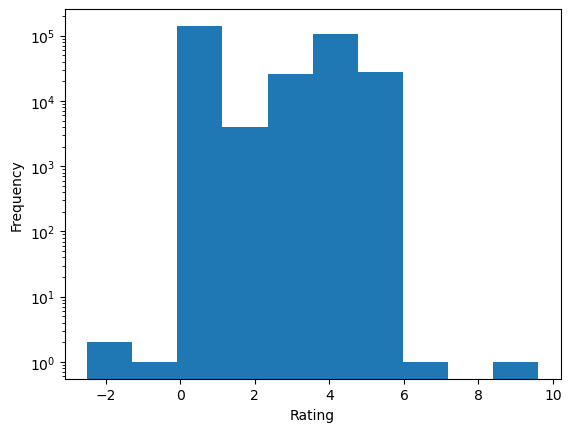

In [6]:
Rating_plot = df['Rating'].plot(kind='hist')
Rating_plot.set_yscale('log')
Rating_plot.set_xlabel('Rating')
Rating_plot.set_ylabel('Frequency')

In [7]:
df_invalid_ratings = df.loc[(df['Rating'] < 0) | (df['Rating'] > 5)]

2. Clean the dataset by removing rows with invalid installs and ratings

    As it is not reasonable for an app to have a rating greater than 0 without being installed, invalid values are defined as any app with maximum installs of 0 and has a rating above 0.

    Perform the selection of rows with invalid values and store the results in the variable ``df_invalid_install_ratings``.

In [8]:
df_invalid_install_ratings = df[(df['Installs'] == 0) & (df['Rating'] > 0)]

3. Clean the column ``Installs`` by removing invalid values

    As the whole population in the world now is around 10 billion people, invalid values are defined as any value above or equal to 10 billion.

    Perform the selection of rows with invalid values and store the results in the variable ``df_invalid_installs``.

In [9]:
df_invalid_installs  = df[df['Installs'] >= 10_000_000_000]

## Basic Activities: Outliers

Now, let's use statsitical definitions to identify and clean outliers.

4. Clean the column ``Ratings`` by removing outliers

    Take a look at the histogram that is in the Notebook. By analyzing it, outliers are defined as any values 3 or more std to the left or right of the mean.

    Calculate te Z-Score

    Perform the outlier identification and store the results in a new column ``df_rating['Rating_cleaned']``.

<Axes: ylabel='Frequency'>

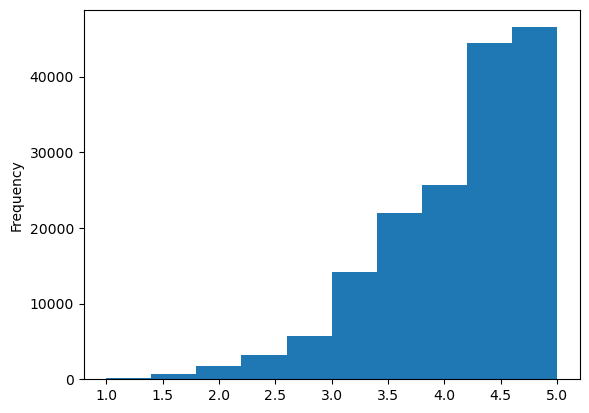

In [10]:
df_rating = df.copy()
df_rating = df_rating[(df_rating['Rating'] > 0) & (df_rating['Rating'] <= 5)]
df_rating['Rating'].plot(kind='hist')

Z - Score

In [11]:
df_rating['Rating_cleaned'] = ((df_rating['Rating'] - df_rating['Rating'].mean()) / df_rating['Rating'].std()).abs() > 3

5. Clean the column ``Price`` by removing outliers

    Take a look at the box plot that is in the Notebook. By analyzing it, outliers are defined as any values that are 1.5 IQR to the left or right.

    - Note: Here, we are interested only in Paid apps not Free apps.

    Perform the outlier identification and store the results in a new column ``df_Price['Price_cleaned']``.

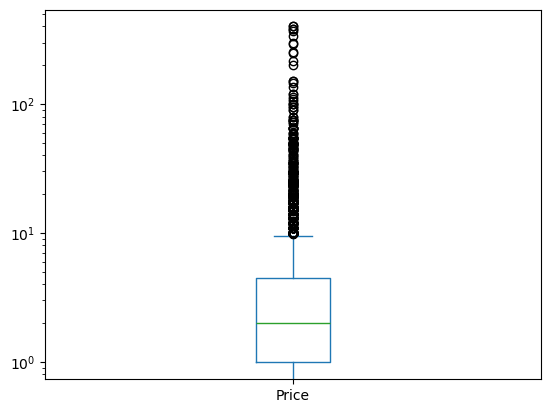

In [12]:
df_Price = df.copy()
df_Price = df_Price[df_Price['Free'] == False]
Price_plot = df_Price['Price'].plot(kind='box')
Price_plot.set_yscale('log')

In [13]:
Q1 = df_Price['Price'].quantile(0.25)
Q3 = df_Price['Price'].quantile(0.75)

IQR = Q3 - Q1

In [14]:
df_Price['Price_cleaned'] = ((df_Price['Price'] < Q1 - (IQR * 1.5)) | (df_Price['Price'] > Q3 + (IQR * 1.5)))

6. Clean the column ``Size`` by removing outliers

    Take a look at the size counts that is in the Notebook. By analyzing it, outliers are defined as any value that is more than or equal to GigaByte ``G``.

    Perform the outlier identification and store the results in a new column ``df['Size_cleaned']``.

In [15]:
size_counts = df['Size'].str.extract(r'([0-9\.]+)([MkG]?)')[1].value_counts()

if '' in size_counts:
    size_counts = size_counts.rename(index={'': 'Bytes'})

size_counts

1
M        293764
k          4757
Bytes       140
G             4
Name: count, dtype: int64

In [16]:
df['Size_cleaned'] = df['Size'].str.contains('G', na = False)

## Advanced Activities: Invalid Values

7. Clean the column ``Released`` by removing invalid values.

    Invalid values are defined as any value that contains a date in the future (later than now).

    Perform the selection of rows with invalid values and store the results in the variable ``df_invalid_release_date``.

In [17]:
df['Released'] = pd.to_datetime(df['Released'])

df_invalid_release_date = df[df['Released'] > datetime.now()]

8. Clean the column ``Developer Email`` by removing invalid values

    Invalid values are defined as any value that does not contain ``@`` in the email.

    Perform the selection of rows with invalid values and store the results in the variable ``invalid_emails``.

In [18]:
invalid_emails = df[~df['Developer Email'].str.contains('@')]

9. Clean the column ``Size`` by removing invalid values

    Take a look at the histogram that is in the Notebook. By analyzing it, you will find different size units. As the mobile phones nowadays have a maximum storage of 1TB, let's define invalid values as any value above or equal 1TB.

    Perform the selection of rows with invalid values and store the results in the variable ``df_invalid_size``.

    - Note: do not forget to consider only not (NA / NaN) values.

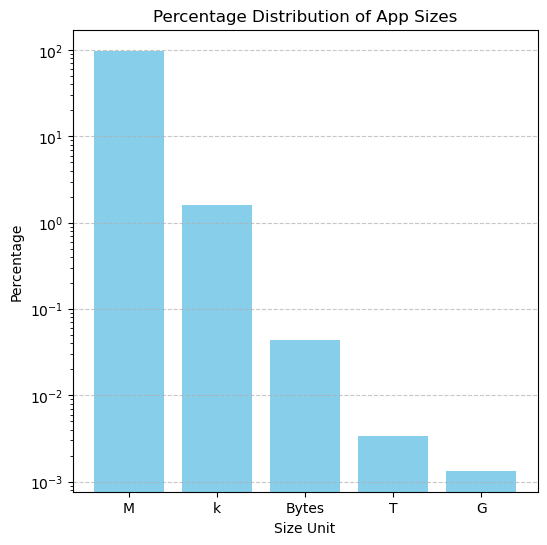

In [19]:
size_counts = df['Size'].str.extract(r'([0-9\.]+)([MkGT]?)')[1].value_counts()

if '' in size_counts:
    size_counts = size_counts.rename(index={'': 'Bytes'})
    
size_percents = size_counts / size_counts.sum() * 100

# Plot the percentages in a histogram
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(size_percents.index, size_percents, color='skyblue')
ax.set_xlabel('Size Unit')
ax.set_ylabel('Percentage')
ax.set_title('Percentage Distribution of App Sizes')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_yscale('log')
plt.show()

In [20]:
df_invalid_size = df[df['Size'].str.contains('T', na = False)]

## Advanced Activities: Outliers

Now, let's go deep using statistical definitions to identify and clean outliers.

10. Clean the column ``Installs`` by removing outliers

    Take a look at the box plot that is in the Notebook. By analyzing it, outliers are defined as any values that are to the right of the 95% percentile (>= 95% percentile).

    Perform the outlier identification and store the results in a new column ``df_installs['Installs_cleaned']``.

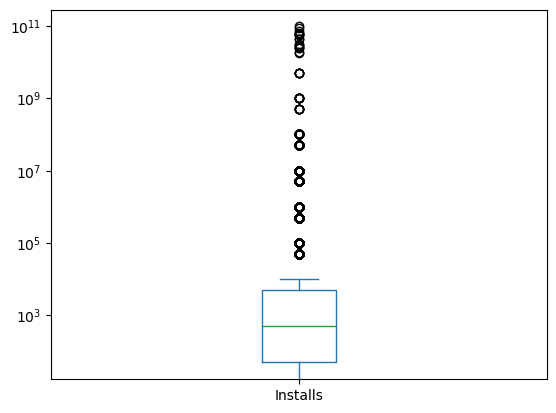

In [21]:
df_installs = df.copy()
installs_plot = df_installs['Installs'].plot(kind='box')
installs_plot.set_yscale('log')

In [22]:
df_installs['Installs_cleaned'] = (df_installs['Installs'] >= df_installs['Installs'].quantile(0.95))

11. Clean the column ``Category`` by removing outliers

    Take a look at the box plot that is in the Notebook. By analyzing it, outliers are defined as any values 2.5 or more std deviations to the left or right of the mean.

    Perform the outlier identification and store the results in a new series ``Category_outliers``.

<Axes: >

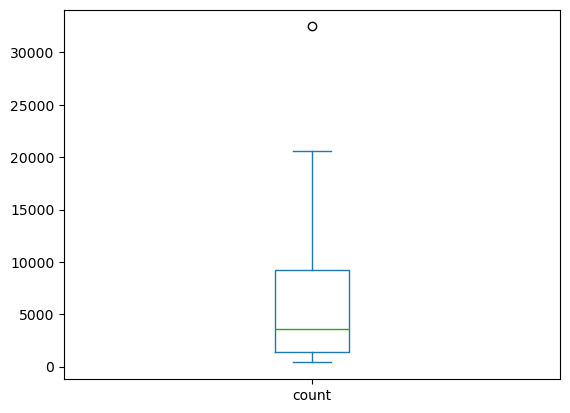

In [23]:
Category_counts = df['Category'].value_counts()
Category_counts.plot(kind='box')

In [37]:
Category_outliers = ((Category_counts - Category_counts.mean()) / Category_counts.std() > 2.5)

12. Clean the column ``Release Year`` by removing outliers

    Take a look at the box plot that is in the Notebook. By analyzing it, outliers are defined as any values that are 1.8 IQR to the left or right.

    Perform the outlier identification and store the results in a new column ``df_release_year['Release_Year_cleaned']``.

    > *Define ``Q1_year`` as the value dividing the lowest 25%, ``Q3_year`` dividing the lowest 75%, and ``IQR_year`` as the range between them.*

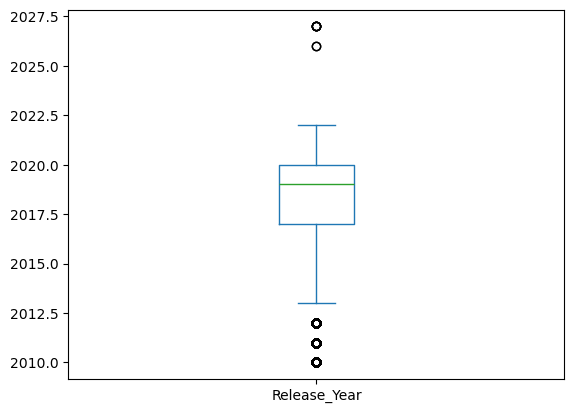

In [38]:
df['Released'] = pd.to_datetime(df['Released'])
df_release_year = df.copy()
df_release_year['Release_Year'] = df_release_year['Released'].dt.year

Release_plot = df_release_year['Release_Year'].plot(kind='box')

In [39]:
# Calculate IQR
Q1_year = df_release_year['Release_Year'].quantile(0.25)
Q3_year = df_release_year['Release_Year'].quantile(0.75)
IQR_year = Q3 - Q1

In [41]:
# Define outliers
df_release_year['Release_Year_cleaned'] = ((df_release_year['Release_Year'] < (Q1_year - 1.8 * IQR_year)) | (df_release_year['Release_Year'] > (Q3_year + 1.8 * IQR_year)))

In [42]:
df_release_year['Release_Year_cleaned']

0         False
1         False
2         False
3          True
4         False
          ...  
308641    False
308642    False
308643    False
308644    False
308645    False
Name: Release_Year_cleaned, Length: 308646, dtype: bool

# Cleaning Google Playstore data

This project covers all the most common aspects of Data Cleaning with Pandas, using a dataset scraped from the Google Playstore.

As you might know, scraping data usually produces incorrect results.

This project includes several cleaning tasks (ranging from invalid values, to missing / duplicate values) and finished with several analysis tasks.

We encourage you to use visualizations as much as possible to understand the data as well as the missingno library, which is already ``installed``, imported and ready to use.

> ***Important! Please make sure to resolve activities in order for them to work properly. Some of the latest activities rely on the first ones to be completed to work.***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [17]:
df = pd.read_csv('files/googleplaystore2.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
786,Coursera: Online courses,EDUCATION,4.4,90481,Varies with device,"5,000,000+",Free,0,Everyone,Education,27-Jul-18,Varies with device,Varies with device
3413,Waterfall Live Wallpaper,PERSONALIZATION,4.1,112977,13M,"10,000,000+",Free,0,Everyone,Personalization,22-May-18,3.6,4.1 and up
7451,FANDOM for: GTA,FAMILY,3.9,39038,9.5M,"5,000,000+",Free,0,Mature 17+,Entertainment,6-Jun-18,2.9.8,4.4 and up
4611,AT&T Call Protect,COMMUNICATION,4.2,6454,15M,"5,000,000+",Free,0,Everyone,Communication,3-May-18,1.5.13-3598,5.0 and up
9359,Miraculous Ladybug & Cat Noir - The Official Game,GAME,4.5,185382,99M,"10,000,000+",Free,0,Everyone,Action,30-Jul-18,1.0.6,4.4 and up


## Data cleaning

1. Which of the following column(s) has/have null values?

    Select the columns that you have identified having null/missing values. We encourage you to use the ``missingno`` library.

In [18]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

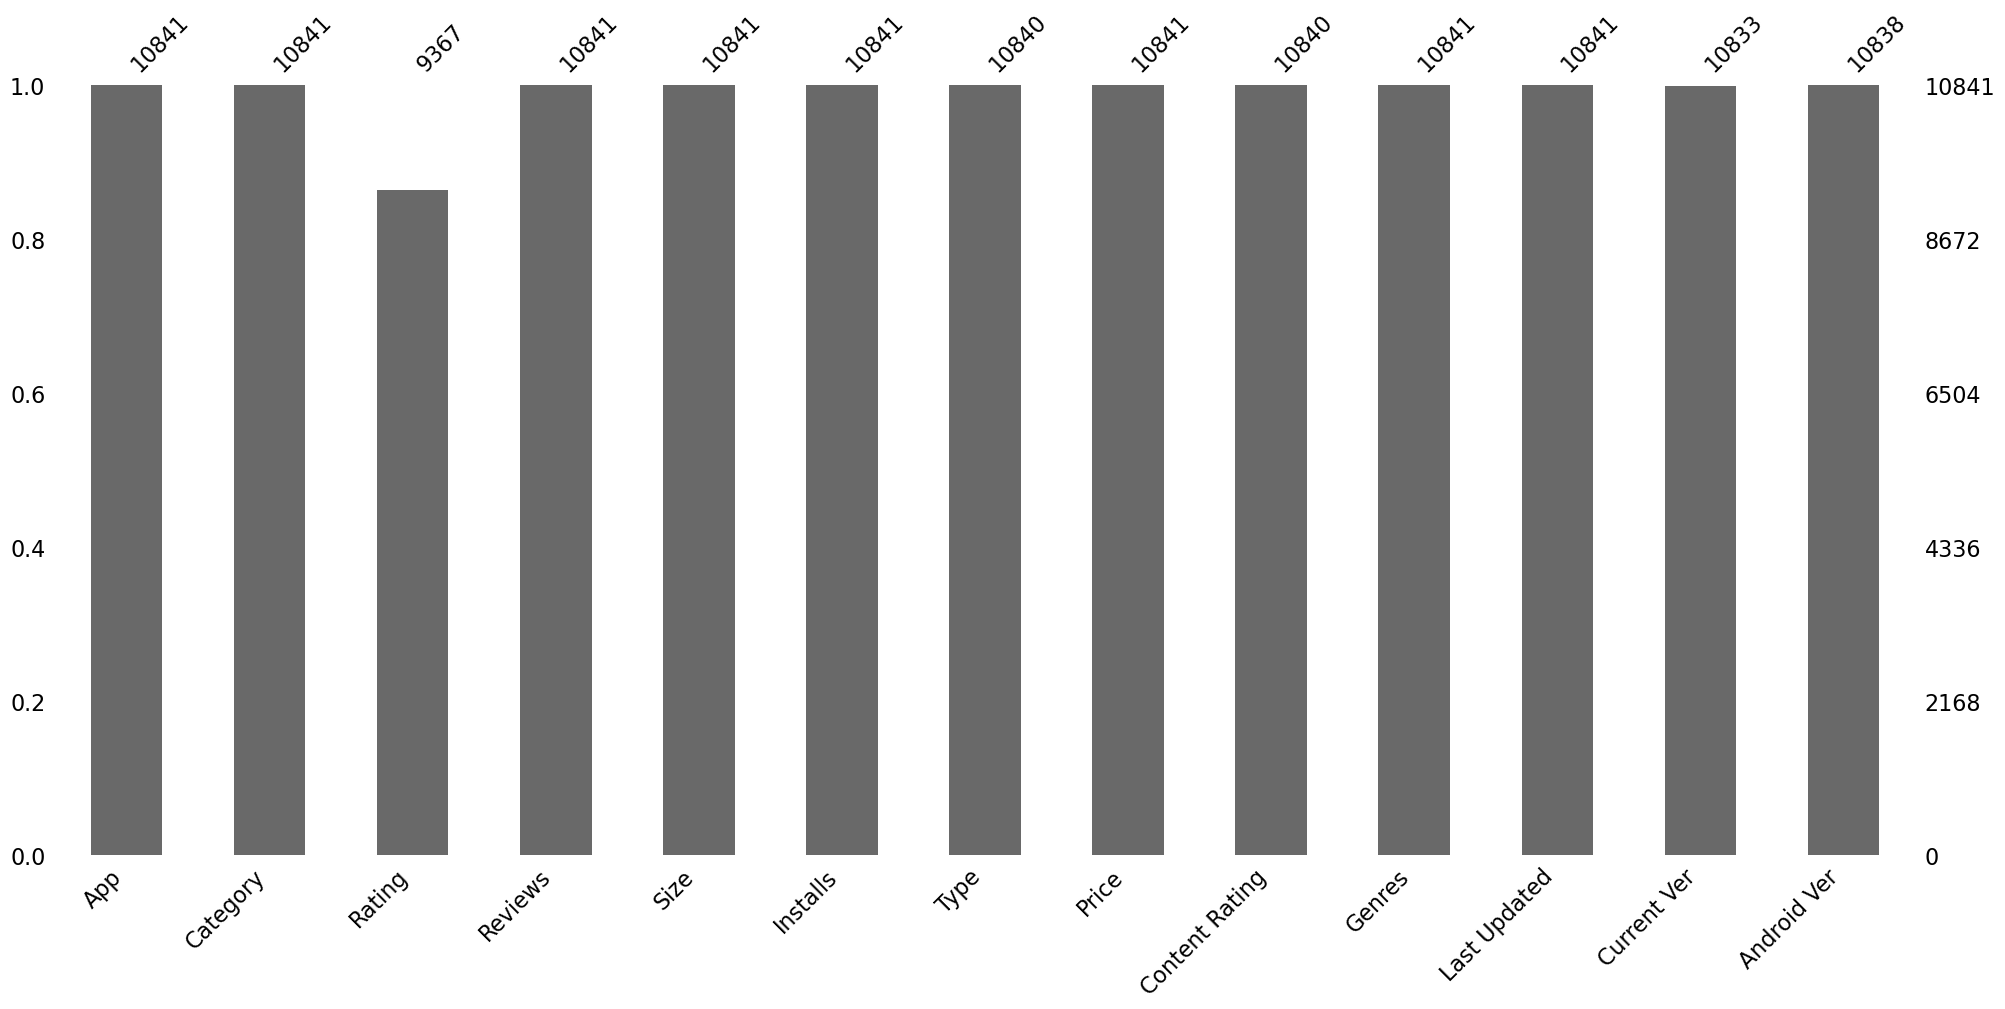

In [19]:
msno.bar(df)

2. Clean the Rating column and the other columns containing null values

    This is a 3-part activity:

    - Remove the invalid values from ``Rating`` (if any). Just set them as NaN.
    - Fill the null values in the ``Rating`` column using the ``mean()``
    - Clean any other non-numerical columns by just dropping the values.
    
    Perform the modifications "in place", modifying ``df``. If you make a mistake, re-load the data.

    > All the ratings that are not in the range of 0 to 5 should be replaced with ``NaN``.
    
    > For the other columns, just drop the rows that contain null values.

Invalid Values

In [20]:
df.loc[((df['Rating'] > 5) | (df['Rating'] < 0)), ['Rating']] = np.nan

Fill Null Values

In [21]:
df['Rating'].fillna(value = df['Rating'].mean(), inplace = True)

Drop the rows for any other columns with Nan values

In [22]:
df.dropna(inplace = True)

<Axes: >

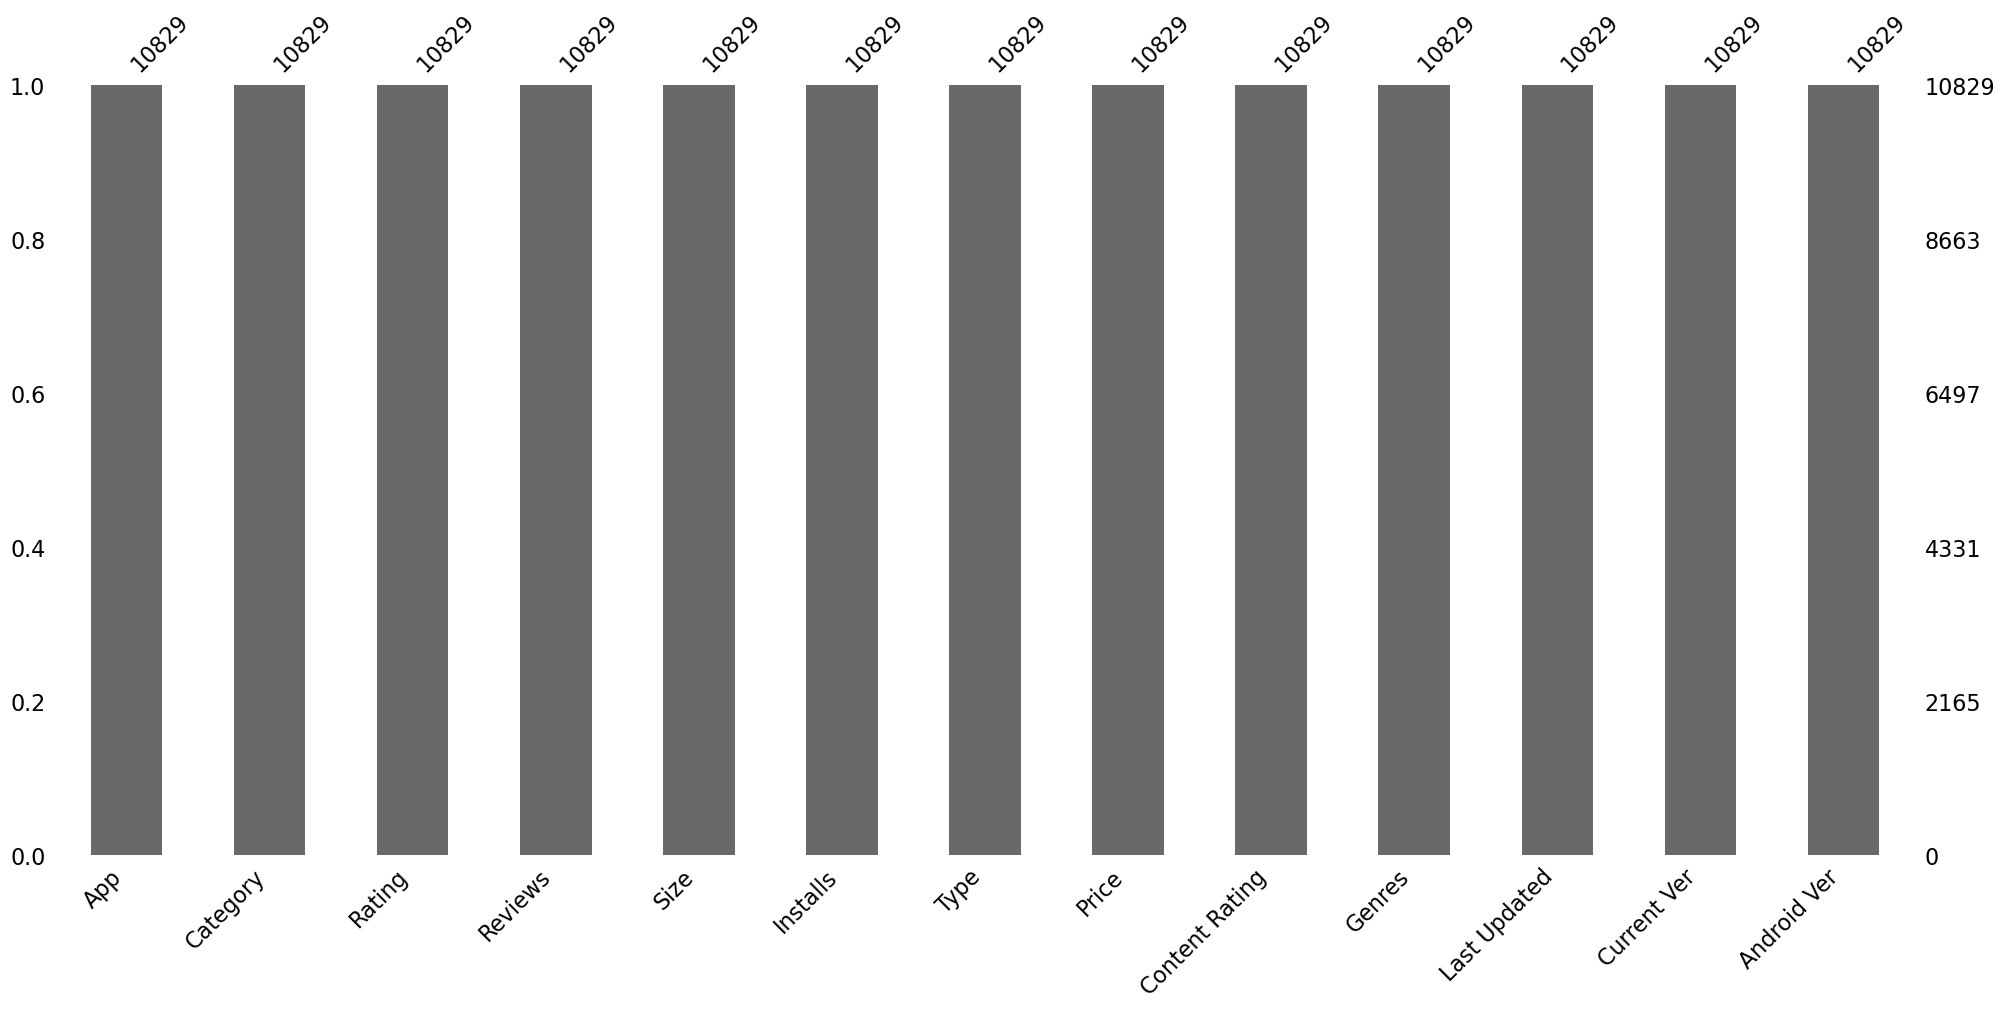

In [23]:
msno.bar(df)

3. Clean the column ``Reviews`` and make it numeric

    You'll notice that some columns from this dataframe which should be numeric, were parsed as ``object`` (string). That's because sometimes the numbers are expressed with ``M``, or ``k`` to indicate ``Mega`` or ``kilo``.

    Clean the ``Reviews`` column by transforming the values to the correct numeric representation. For example, ``5M`` should be ``5000000``.

In [24]:
df.loc[df['Reviews'].str.contains('M'), 'Reviews']  = pd.to_numeric(df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M','')) * 1_000_000

In [25]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [26]:
df.loc[1781]

App               Trivia Crack
Category                  GAME
Rating                     4.5
Reviews              6400000.0
Size                       95M
Installs          100,000,000+
Type                      Free
Price                        0
Content Rating        Everyone
Genres                  Trivia
Last Updated          3-Aug-18
Current Ver             2.79.0
Android Ver         4.1 and up
Name: 1781, dtype: object

4. How many duplicated apps are there?

    Count the number of duplicated rows. That is, if the app ``Twitter`` appears 2 times, that counts as 2.

In [27]:
series = df.groupby(df['App']).size().sort_values(ascending = False) 

series = series[series > 1]

In [28]:
series.sum()

1979

In [29]:
df['App'].duplicated(keep=False).sum()

1979

In [30]:
df['App'].duplicated().sum()

1181

5. Drop duplicated apps keeping only the ones with the greatest number of reviews

    Now that the ``Reviews`` column is numeric, we can use it to clean duplicated apps. Drop duplicated apps, keeping just one copy of each, the one with the greatest number of reviews.

    Hint: you'll need to sort the dataframe by ``App`` and ``Reviews``, and that will change the order of your ``df``.

In [31]:
df.sort_values(['App', 'Reviews'], inplace=True)

index = df[df.duplicated(subset=['App'], keep='last') == True].index

df.drop(index, inplace=True)

Otra solución

In [ ]:
df_sorted = df.sort_values(by=['App', 'Reviews'])

df_sorted.loc[
    df_sorted['App'].duplicated(keep=False) & ~df_sorted.duplicated(keep=False),
    ['App', 'Reviews']
].head(5)

df_sorted.drop_duplicates(subset=['App'], keep='last', inplace=True)
df = df_sorted

6. Format the ``Category`` column

    Categories are all uppercase and words are separated using underscores. Instead, we want them with capitalized in the first character and the underscores transformed as whitespaces.

    Example, the category ``AUTO_AND_VEHICLES`` should be transformed to: ``Auto and vehicles``. Also, if you find any other wrong value transform it into an ``Unknown`` category.

In [32]:
df['Category'] = df['Category'].str.capitalize().str.replace("_"," ")

In [33]:
df.loc[df['Category'] == "1.9", 'Category'] = 'Unknown'

7. Clean and convert the ``Installs`` column to numeric type

    Clean and transform ``Installs`` as a numeric type. Some values in ``Installs`` will have a ``+`` modifier. Just remove the string and honor the original number (for example ``+2,500`` or ``2,500+`` should be transformed to the number ``2500``).

In [34]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype('int64')

8. Clean and convert the ``Size`` column to numeric (representing bytes)

    The ``Size`` column is of type object. Some values contain either a ``M`` or a ``k`` that indicate Kilobytes (1024 bytes) or Megabytes (1024 kb). These values should be transformed to their corresponding value in bytes. For example, ``898k`` will become ``919552`` (``898 * 1024``).

    Some other values are completely invalid (there's no way to infer the numeric type from them). For these, just replace the value for 0.

    Some other rules are related to ``+`` modifiers, apply the same rules as the previous task.

In [38]:
df.loc[~df['Size'].str.contains(r'[Mk]'), 'Size'] = '0'

df['Size'] = df['Size'].str.replace('+','')

df.loc[df['Size'].str.contains('M'), 'Size'] = (pd.to_numeric(df.loc[df['Size'].str.contains('M'), 'Size'].str.replace('M',''))*1_048_576).astype('str')

df.loc[df['Size'].str.contains('k'), 'Size'] = (pd.to_numeric(df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k',''))*1024).astype('str')

df['Size'] = df['Size'].astype('float64')

9. Clean and convert the ``Price`` column to numeric

    Values of the ``Price`` column are strings representing price with special symbol ``'$'``.

In [54]:
df['Price'] = df['Price'].str.replace('$', '')

df.loc[df['Price'].str.contains(r'[A-Za-z]'), 'Price'] = 0

df['Price'] = pd.to_numeric(df['Price'])

10. Paid or free?

    Now that you have cleaned the ``Price`` column, let's create another auxiliary ``Distribution`` column.

    This column should contain ``Free/Paid`` values depending on the app's price.

In [62]:
df['Distribution'] = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid')

## Analysis

11. Which app has the most reviews?

    Which app has the greatest number of reviews?

In [75]:
df[['App', 'Reviews']].sort_values(by=['Reviews'], ascending=False).head()

,App,Reviews
2544,Facebook,78158306.0
381,WhatsApp Messenger,69119316.0
2604,Instagram,66577446.0
382,Messenger – Text and Video Chat for Free,56646578.0
1879,Clash of Clans,44893888.0


2. What category has the highest number of apps uploaded to the store?

    For this activity you need to get the specific category that contains the most significant number of uploaded applications.

In [85]:
df['Category'].value_counts()

Category
Family                 1874
Game                    945
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               105
Entertainment            86
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Art and design           60
Parenting                60
Comics                   56
Beauty                   53
Name: count, dtype: int64

13. To which category belongs the most expensive app?

In [97]:
df.sort_values(by = ['Price'], ascending  = False).loc[:,['Category']].head()

,Category
4367,Lifestyle
5358,Finance
5356,Finance
5362,Family
4197,Family


14. What's the name of the most expensive game?

    Find the most expensive app in the ``Game`` category and enter its name:

In [100]:
df[df['Category'] == 'Game'].sort_values(by= 'Price', ascending = False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4203,The World Ends With You,Game,4.6,4108.0,13631488.0,10000,Paid,17.99,Everyone 10+,Arcade,14-Dec-15,1.0.4,4.0 and up,Paid


15. Which is the most popular Finance App?

    What app (from the ``Finance`` category) has the most installs?

In [101]:
df[df['Category'] == 'Finance'].sort_values(by= 'Installs', ascending = False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
5601,Google Pay,Finance,4.2,348132.0,0,100000000,Free,0.0,Everyone,Finance,26-Jul-18,2.70.206190089,Varies with device,Free


16. What Teen Game has the most reviews?

    What app from the ``Game`` category and catalogued as Teen in ``Content Rating`` has the greatest number of reviews?

In [102]:
df[(df['Category'] == 'Game') & (df['Content Rating'] == 'Teen')].sort_values(by= 'Reviews', ascending = False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
3912,Asphalt 8: Airborne,Game,4.5,8389714.0,96468992.0,100000000,Free,0.0,Teen,Racing,4-Jul-18,3.7.1a,4.0.3 and up,Free


17. Which is the free game with the most reviews?

    Get the name of the free game app with the greatest number of reviews.

In [103]:
df[(df['Distribution'] == 'Free') & (df['Category'] == 'Game')].sort_values(by= 'Reviews', ascending = False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
1879,Clash of Clans,Game,4.6,44893888.0,102760448.0,100000000,Free,0.0,Everyone 10+,Strategy,15-Jul-18,10.322.16,4.1 and up,Free


18. How many Tb (tebibytes) were transferred (overall) for the most popular Lifestyle app?

    This app produced the greatest amount of bytes transfer. Enter your answer in Tebibytes as a whole number (rounding down to the nearest integer). Example, if you find the total transfer to be ``780.9581`` Tb, just enter ``780``.

In [ ]:
df['Transfer'] = df['Size'] * df['Installs']

In [ ]:
app = df.loc[df['Category'] == 'Lifestyle'].sort_values(by='Installs', ascending=False).iloc[0]

In [ ]:
(app['Installs'] * app['Size']) / (1024 * 1024 * 1024 * 1024)

6486 Tebibytes

# Cleaning NYC Airbnb Data

The New York City Airbnb Open Data is a rich source of information for exploring the city's Airbnb market. The dataset contains detailed information on Airbnb listings in the city, including their locations, prices, availability, and various other attributes.

The goal of this capstone project is to help you develop your skills in data cleaning and preparation by working with real-world data using Python. You will use Pandas, a popular Python library for data manipulation and analysis, to read the data from a CSV file, handle missing values, deal with duplicates, and clean and transform the data to answer various questions about the Airbnb market in New York City.

In this capstone project, you will complete a series of activities that cover different aspects of data cleaning and preparation using Pandas. By the end of this project, you will have gained practical skills in data manipulation, cleaning, and preparation using Pandas, and be ready to tackle more complex data analysis tasks.

Let's get started with the activities and explore the fascinating world of the New York City Airbnb market! 👉

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('files/AB_NYC.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


In [4]:
#show the number of cells in the dataframe
print("dataset size: ", df.size)

#show the number of records (rows) in the dataframe
print("number of hosts: ", len(df))

#show the number of features (coulmns) in the dataframe
print("number of features: ", len(df.columns)) 

dataset size:  782320
number of hosts:  48895
number of features:  16


In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Cleaning the dataset

1. Find out the missing values in each column

    Perform the calculation and store the results in the variable ``col_missing_values``.

In [36]:
col_missing_values = df.isnull().sum()

In [37]:
col_missing_values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                21
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

2. Drop the column ``reviews_per_month`` as it has many values missing and we will not use it

    You have to drop this column permanently as we can not use it for any purpose.

In [9]:
df.drop(columns=['reviews_per_month'], inplace= True)

3. Drop the rows having more than 1 missing values

    Store the resulting DataFrame in the variable ``df_rows_dropped``.

``thresh = ``Keep only the rows with at least ``t`` non-NA values.

In [47]:
df.shape[1]

15

In [44]:
df_rows_dropped = df.dropna(thresh = df.shape[1] - 1, axis = 0)

In [45]:
df_rows_dropped.isnull().sum()

id                                    0
name                                  6
host_id                               0
host_name                            16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                19
minimum_nights                        0
number_of_reviews                     0
last_review                       10035
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [48]:
len(df_rows_dropped)

48878

4. Fill the 21 missing values in ``host_name`` with the value ``Airbnb``

    Store your result in the variable ``host_total``.

In [49]:
values = {'host_name': 'Airbnb'}

host_total = df.fillna(value= values)['host_name']

5. Check if any name in the Column ``host_name`` has digit(s) or number(s) in it

In [54]:
df['host_name'].str.isdigit().sum()

6

In [55]:
df['host_name'].str.isalpha().sum()

44929

6. Fill the 21 missing values of the column ``price`` with the mean of the column

    Store your result in the variable ``mean_df_price``.

In [56]:
mean_df_price = df['price'].fillna(df['price'].mean())

7. Fill all missing values in ``last_review`` using forward filling method

    Store your result in the variable ``ffill_review``.

In [58]:
ffill_review = df['last_review'].ffill()

8. Select duplicate hosts in a dataframe based on ``name``, ``host_id``, and ``price`` columns

    - Perform the selection and store the results in the variable ``duplicate_hosts``.
    - Note: ensure that all duplicates are selected.

In [60]:
duplicate_hosts = df[df.duplicated(subset=['name', 'host_id', 'price'], keep=False)]

In [62]:
df[duplicate_hosts]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
321,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179.0,3,36,2019-07-01,28,79
327,80684,Duplex w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73776,-73.95327,Private room,349.0,3,8,2016-03-27,28,60
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249.0,3,2,2011-05-12,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179.0,3,13,2019-06-27,28,81
447,158061,Hancock Town House!-Stuyvesant Mews,758441,Fred,Brooklyn,Bedford-Stuyvesant,40.68669,-73.91989,Private room,165.0,1,27,2017-10-08,4,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47965,36003858,★Premier Queen Room with Balcony ★,270874051,Hotel Vetiver,Queens,Long Island City,40.75436,-73.93483,Private room,99.0,1,0,NaN,8,319
48026,36039574,★Premier Queen Room with Balcony ★,270874051,Hotel Vetiver,Queens,Long Island City,40.75300,-73.93485,Private room,99.0,1,0,NaN,8,319
48662,36372006,Very Clean Private Room Near Buses & Restauran...,118405437,PengYu,Queens,Woodhaven,40.69411,-73.86877,Private room,66.0,1,0,NaN,2,365
48677,36381008,Comfort home,266211707,Yan,Brooklyn,Sunset Park,40.64454,-74.02010,Private room,185.0,1,0,NaN,2,175


9. Which option to set for keep parameter when dropping all duplicates is needed?

In [ ]:
False

10. Drop duplicates while keeping the first non-NaN value based on ``name``, ``host_id``, and ``price`` columns

    Perform the dropping and store the results in the variable ``df_unique_hosts``.

    - Note: do not do this change in the original dataframe ``df`` to avoid miscalculation in the following activities.

In [63]:
df_unique_hosts = df.drop_duplicates(subset=['name', 'host_id', 'price'], keep= 'first')

11. How many users in the Column ``room_type`` are ``Private room``?

    Let's count all the Private rooms in the column ``room_type`` and sum them up.

    Store your sum in the ``private_rooms_counts`` variable.

In [72]:
private_rooms_counts = len(df[df['room_type'] == 'Private room']['room_type'])

Otra solución

In [ ]:
private_room_counts = df['room_type'].str.count('Private room')
private_room_counts = private_room_counts.sum()
private_room_counts